In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

In [ ]:
trainingSet = torchvision.datasets.FashionMNIST("./data", download=True, transform=
                                                transforms.Compose([transforms.ColorJitter(brightness=0.2, contrast=0.3, saturation=0.4, hue=0.5),
                                                                    transforms.RandomHorizontalFlip(),transforms.ToTensor()]))
testingSet = torchvision.datasets.FashionMNIST("./data", download=True, train=False, transform=
                                               transforms.Compose([transforms.ToTensor()]))
trainSetX = torch.utils.data.DataLoader(trainingSet, 
                                           batch_size=100)
testSetX = torch.utils.data.DataLoader(testingSet,
                                          batch_size=100)

Length of Training Set :  60000
9


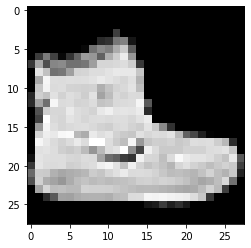

In [ ]:
a = next(iter(trainSetX))
a[0].size()
print("Length of Training Set : ",len(trainingSet))
image, label = next(iter(trainingSet))
plt.imshow(image.squeeze(), cmap="gray")
print(label)

In [ ]:
class F_MNIST_NN2(nn.Module):
    
    def __init__(self):
        super(F_MNIST_NN2, self).__init__()
        
        self.layer1 = nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, padding=1,stride=1)
        self.layer2=torch.nn.MaxPool2d(kernel_size=2, stride=2,padding=1)
        self.layer3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1,stride=1)
        self.layer4=torch.nn.MaxPool2d(kernel_size=2, stride=2,padding=1)
        self.layer5 = nn.Sequential(nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1,stride=2),
                                    nn.BatchNorm2d(256))
        self.layer6 = nn.Sequential(nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1,stride=2),
                                    nn.BatchNorm2d(512))
        self.layer7=torch.nn.MaxPool2d(kernel_size=2, stride=1,padding=1)
        self.layer8 = nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=3, padding=1,stride=2)
        self.layer9=torch.nn.MaxPool2d(kernel_size=2, stride=2,padding=0)
        self.fc1 = nn.Linear(in_features=1024, out_features=512)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=512, out_features=256)
        self.fc3 = nn.Sequential(
            nn.Linear(in_features=256, out_features=10),
            nn.BatchNorm1d(10)
        )
        #self.fc3 = nn.Linear(in_features=1024, out_features=10)
        
    def forward(self, x):
        out = F.relu(self.layer1(x))
        out = F.relu(self.layer2(out))
        out = F.relu(self.layer3(out))
        out = F.relu(self.layer4(out))
        out = F.relu(self.layer5(out))
        out = F.relu(self.layer6(out))
        out = F.relu(self.layer7(out))
        out = F.relu(self.layer8(out))
        out = F.relu(self.layer9(out))
        out=out.view(out.shape[0],-1)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return F.softmax(out,dim=1)
model2 = F_MNIST_NN2()
error = nn.CrossEntropyLoss()
learning_rate = 0.009
optimizer = torch.optim.Adam(model2.parameters(), lr=learning_rate)
print(model2)

F_MNIST_NN2(
  (layer1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (layer2): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (layer4): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer5): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer6): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer7): MaxPool2d(kernel_size=2, stride=1, padding=1, dilation=1, ceil_mode=False)
  (layer8): Conv2d(512, 1024, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (layer9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Lin

In [ ]:
BATCH_SIZE=100
EPOCHS=10
counter=0
for rpochs in range(EPOCHS):
    for inputs, tags in tqdm(trainSetX):
        train = Variable(inputs.view(100, 1, 28, 28))
        tags = Variable(tags)
        outputs = model2(train)
        loss = error(outputs, tags)
        optimizer.zero_grad()
        #Propagating the error backward
        loss.backward()
        # Optimizing the parameters
        optimizer.step()
        counter+=1
        if counter%600==0:
            correct=0
            total=0
            for images, labels in testSetX:
                test = Variable(images.view(100, 1, 28, 28))
                outputs = model2(test)
                predictions = torch.max(outputs, 1)[1]
                correct += (predictions == labels).sum()
                total += len(labels)
            accuracy = correct * 100 // total
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(counter, loss.data, accuracy))

  0%|          | 0/600 [00:00<?, ?it/s]

Iteration: 600, Loss: 1.573667287826538, Accuracy: 85%


  0%|          | 0/600 [00:00<?, ?it/s]

Iteration: 1200, Loss: 1.5566097497940063, Accuracy: 86%


  0%|          | 0/600 [00:00<?, ?it/s]

Iteration: 1800, Loss: 1.5711146593093872, Accuracy: 87%


  0%|          | 0/600 [00:00<?, ?it/s]

Iteration: 2400, Loss: 1.54717218875885, Accuracy: 88%


  0%|          | 0/600 [00:00<?, ?it/s]

Iteration: 3000, Loss: 1.5722832679748535, Accuracy: 88%


  0%|          | 0/600 [00:00<?, ?it/s]

Iteration: 3600, Loss: 1.5386123657226562, Accuracy: 88%


  0%|          | 0/600 [00:00<?, ?it/s]

Iteration: 4200, Loss: 1.5293775796890259, Accuracy: 89%


  0%|          | 0/600 [00:00<?, ?it/s]

Iteration: 4800, Loss: 1.5454964637756348, Accuracy: 89%


  0%|          | 0/600 [00:00<?, ?it/s]

Iteration: 5400, Loss: 1.565080165863037, Accuracy: 89%


100%|██████████| 600/600 [13:37<00:00,  1.36s/it]

Iteration: 6000, Loss: 1.543603777885437, Accuracy: 90%
